# *Basic Operation of Digital Image Processing*


Di bawah ini saya akan menjabarkan beberapa hal yang menjadi operasi dasar pada pengolahan citra digital. Yang perlu diperhatikan adalah saya menggunakan bahasa pemograman python dengan library yang digunakan adalah sebagai berikut:
1. OpenCV = digunakan hampir pada seluruh proses DIP dan comvis
2. numpy = library khusus untuk menghitung operasi matriks
3. Matplotlib = digunakan untuk plotting


Mohon diperhatikan, apa yang sudah tertulis pada buku *Panduan Visi Komputer* seperti teori maupun rumus tidak akan saya tuliskan semua kembali pada *notebook* ini.

## Operasi Dasar
Berikut adalah operasi dasar dari module opencv yang sebagian dibuat sendiri dan sebagian lagi mengikuti dari blog opencv.

#### 1. Membaca citra.
Siapkan sebuah citra dalam satu folder yang sama dengan projek DIP. Citra yang bisa digunakan adalah berekstensi .jpg, .png dan .pgm. Pertama yang perlu dilakukan adalah melakukan import modul OpenCV terlebih dahulu

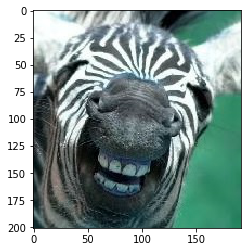

In [1]:
import cv2 # Library opencv
import matplotlib.pyplot as plt 
# digunakan untuk menampilkan citra pada jupyter notebook 

img = cv2.imread("Asset/gambar.jpg") # Ini gambar favorit saya!
# Pada program python biasa, bisa menggunakan: 
# cv2.imshow("judul", variabel_citra)
plt.imshow(img)
plt.show()
# Oh ada yang aneh dengan citra ini, apa ya?

#### 2. Mengambil nilai pada koodinat x,y.
Hal yang perlu diperhatikan adalah citra merupakan matriks 3 dimensi yang berisi nilai pada sumbu x dan y dimana nilai tersebut ada yang terdiri dari tiga nilai atau hanya menggunakan satu nilai. Hal ini disebut dengan color channel atau color space yang akan dijelaskan pada subbab berikutnya.

In [6]:
pixel_x1_y1 = img[1,1]
# Ingat python dimulai dari 0
print("pixel pada koordinat x=1 dan y=1", pixel_x1_y1) 
# pada opencv, untuk mengakses pada nilai pixel tersebut, 
# yang perlu diinput terlebih dahulu adalah sumbu y dahulu
print("pixel pada koordinat x=1 dan y=3", img[3,1]) 
# Untuk mengambil warna tertentu pada pixel koordinat tertentu
print("pixel merah pada x=1, y=3", img[3,1,2])
print("pixel biru pada x=3, y=10", img[10,3,1])
print("pixel hijau pada x=2, y=1", img[1,2,0])

pixel pada koordinat x=1 dan y=1 [253 253 253]
pixel pada koordinat x=1 dan y=3 [252 254 254]
pixel merah pada x=1, y=3 254
pixel biru pada x=3, y=10 254
pixel hijau pada x=2, y=1 254


#### 2.1 Color channel
*Color channel* atau *color space* merupakan spesifikasi standar pada citra digital. Citra pada komputer terdiri dari posisi koordinat x dan y dengan masing-masing posisi tersebut terdapat tiga buah nilai tergantung pada jenis *color channel*nya. Model yang biasa digunakan adalah sebagai berikut:

1. *grayscale* = hanya terdiri dari channel dimana rentang nilainya berada pada 0 hingga 255 yang merupakan intensitas abu-abu 
2. RGB model = terdiri dari channel *Red, Green, Blue* yang biasa digunakan pada layar perangkat digital. Secara default OpenCV menggunakan *color channel* ini tapi urutannya dibalik menjadi BGR.
3. HSV model = berbeda dengan RGB model yang menggunakan warna dasar sebagai pembentuknya, HSV terdiri dari *Hue, Saturation* dan *Value* sebagai pembentuknya. *Color Channel* HSV dapat memisahkan antara citra dengan nilai gelap atau bayangan
4. YCrCb = biasa digunakan pada kompresi video dan citra. Terdiri dari luma (Y), Cr sebagai *red-difference* dan Cb sebagai *blue-difference*
5. L\* a\* b = L sebagai dimensi luminasi dengan a dan b merupakan *color-opponent dimensions*


#### 2.2 Changing color channel
Berikut adalah perhitungan merubah dari RGB menjadi color channel yang lain mengikuti dokumentasi dari [opencv](https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html). 

syntax yang digunakan adalah

```python
cv2.cvtColor(image, value_opencv_color)
```

RGB/BGR $\leftrightarrow$ grayscale (cv2.COLOR_BGR2GRAY, cv2.COLOR_RGB2GRAY, cv2.COLOR_GRAY2BGR, cv2.COLOR_GRAY2RGB).

RGB[A] ke GRAY: 
$ Y \leftarrow 0.299 \cdot R + 0.587 \cdot G + 0.114 \cdot B $

dan GRAY ke RGB[A]: 
$R \leftarrow Y, G \leftarrow Y, B \leftarrow Y, A \leftarrow max(ChannelRange)$

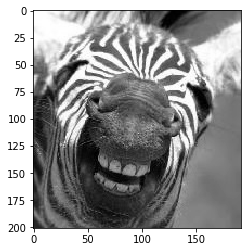

In [10]:
# Merubah citra BGR ke gray
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Untuk menampilkan citra abu-abu, 
# cmap atau color mapping pada matplotlib perlu dignati
plt.imshow(gray_img,cmap='gray')
plt.show()

RGB/BGR $\leftrightarrow$ HSV (cv2.COLOR_BGR2HSV, cv2.COLOR_RGB2HSV, cv2.COLOR_HSV2BGR, cv2.COLOR_HSV2RGB)

$$V \leftarrow max(R,G,B)$$

$$ S \leftarrow \begin{cases}
    \frac{V-min(R,G,B)}{V}     & \quad \text{if } V \neq 0  \\
    0  & \quad \text{otherwise }
  \end{cases}
$$

$$ H \leftarrow \begin{cases}
    60(G-B)/(V - min(R,G,B))     & \quad \text{if } V = R  \\
    120+60(B-R)/(V - min(R,G,B))  & \quad \text{if } V = G \\
    240+60(R-G)/(V - min(R,G,B))  & \quad \text{if } V = B
  \end{cases}
$$

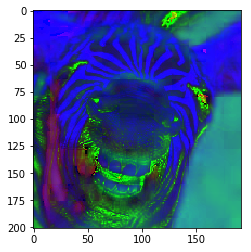

In [11]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(hsv_img)
plt.show()
# Agak serem!

RGB/BGR $\leftrightarrow$ YCrCb (cv2.COLOR_BGR2YCrCb, cv2.COLOR_RGB2YCrCb, cv2.COLOR_YCrCb2BGR, cv2.COLOR_YCrCb2RGB)

RGB ke YCrCb:


$$Y \leftarrow 0.299 \cdot R + 0.587 \cdot G + 0.114 \cdot B$$

$$Cr \leftarrow (R - Y) \cdot 0.713 + delta$$

$$cb \leftarrow (B - Y) \cdot 0.564 + delta$$

$$R \leftarrow Y + 1.403 \cdot (Cr - delta)$$

$$G \leftarrow Y - 0.714 \cdot (Cr - delta) - 0.344 \cdot (Cb - delta)$$

$$B \leftarrow Y + 1.773 \cdot (CB - delta)$$

$\text{where }$

$$delta = \begin{cases}
    128    & \quad \text{for 8-bit images} \\
    32768  & \quad \text{for 16-bit images}\\
    0.5  & \quad \text{for ploating-point images}
  \end{cases}
$$

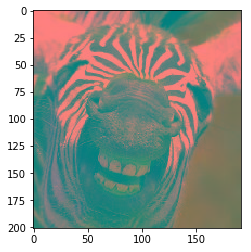

In [12]:
YCrCb_img = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
plt.imshow(YCrCb_img)
plt.show()

RGB/BGR $\leftrightarrow$ L a b (cv2.COLOR_BGR2Lab, cv2.COLOR_RGB2Lab, cv2.COLOR_Lab2BGR, cv2.COLOR_Lab2RGB)

RGB ke CIE L\* a\* b:
$$\begin{bmatrix} X \\ Y \\ Z \end{bmatrix} \leftarrow \begin{bmatrix} 0.412453 & 0.357580 & 0.180423 \\ 0.212671 & 0.715160 & 0.072169 \\ 0.019334 & 0.119193 & 0.950227 \end{bmatrix} \cdot \begin{bmatrix} R \\ G \\ B \end{bmatrix}$$


$$X \leftarrow X/X_n, \text{where} X_n = 0.950456$$

$$Z \leftarrow Z/Z_n, \text{where} Z_n = 1.088754$$


$$L \leftarrow \begin{cases}
    116*Y^{1/3}-16   & \quad \text{for } Y>0.008856 \\
    903.3*Y  & \quad \text{for } Y \le 0.008856
  \end{cases}
$$



$$a \leftarrow 500 (f(X)-f(Y)) + delta$$

$$b \leftarrow 200 (f(Y)-f(Z)) + delta$$

where

$$f(t)=\begin{cases}
    {t^{1/3}} & \quad \text{for \(t>0.008856\)}\\
    {7.787 t+16/116} & \quad \text{for \(t\leq 0.008856\)}
    \end{cases}$$

and 

$$delta =\begin{cases}
{128} & \quad \text{for 8-bit images} \\
{0}& \quad \text{for floating-point images} \end{cases}$$


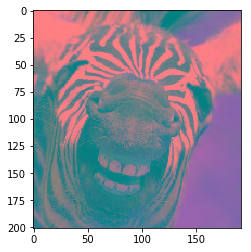

In [13]:
CIELab_img = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)
plt.imshow(CIELab_img)
plt.show()
# Hummm tidak beda jauh dengan YCrCb, bisa dijelaskan mengapa?

#### 2.3 Catatan tambahan
Pada matplotlib.pyplot, parameter cmap dapat menggunakan value sebagai berikut:

```
Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Vega10, Vega10_r, Vega20, Vega20_r, Vega20b, Vega20b_r, Vega20c, Vega20c_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spectral, spectral_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, winter, winter_r
```

#### 3. Mengambil properti citra
Informasi yang bisa didapatkan dari citra seperti jumlah baris dan kolomnya, jumlah channelnya, tipe data, jumlah pixel. Informasi ini berguna untuk digunakan nantinya.

Jumlah pixel 115776
Bentuk citra (201, 192, 3) 
Citra abu-abu (201, 192)
Tipe data <class 'numpy.ndarray'>  tipe data citra uint8
Color space
Memisahkan color channel [b, g, r] (201, 192) (201, 192) (201, 192)
Menggabungkan color channel (201, 192, 3)
Meng-copy citra


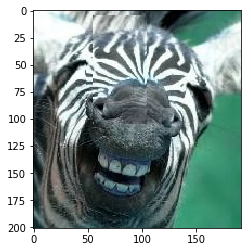

In [31]:
print("Jumlah pixel",img.size) # Untuk mendapatkan jumlah pixel pada citra
print("Bentuk citra", img.shape, "\nCitra abu-abu", gray_img.shape)
# Apa perbedaan dari kedua keluaran tersebut? 
print("Tipe data", type(img)," tipe data citra", img.dtype) 
# Bisa dijelaskan apakah perbedaan dari tipe data dengan tipe data citra?
print("Color space") # Belum dapet

b,g,r = cv2.split(img)
print("Memisahkan color channel [b, g, r]", b.shape, g.shape, r.shape)
img_merge = cv2.merge((b,g,r))
print("Menggabungkan color channel", img_merge.shape)
# Dapat juga menggunakan akses langsung seperti img[:,:,i] dimana i = 0,1,2
# sesuai urutan pada color channelnya

# Mengopy citra ke variabel lain
img2 = img.copy()
print("Meng-copy citra")
plt.imshow(img2)
plt.show()

#### 4. Mengambil region of images (ROI)
ROI atau *region of images* merupakan bagian atau potongan dari citra yang bisa diambil untuk digunakan pada proses yang lain. Seperti pada pengenalan objek, terlebih dahulu kita memotong posisi objek tersebut, barulah dikenali menggunakan fungsi yang lain.

Perlu diperhatikan, untuk memotongnya adalah seperti ini:

img_ROI = img[posisi_y_awal:posisi_y_akhir, posisi_x_awal:posisi_x_akhir]

Hasil yang diberikan adalah perpotongan tersebut

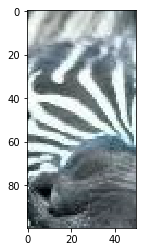

In [18]:
img_ROI = img[0:100, 50:100]
plt.imshow(img_ROI)
plt.show()

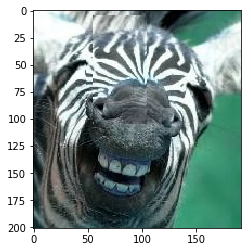

In [26]:
img[5:105, 55:105] = img_ROI
plt.imshow(img)
plt.show()
# Ada yang aneh dengan gambar ini!

#### 5. Membuat padding atau borders pada citra
Untuk membuat border atau padding pada citra, bisa menggunakan fungsi *cv2.copyMakeBorder()*

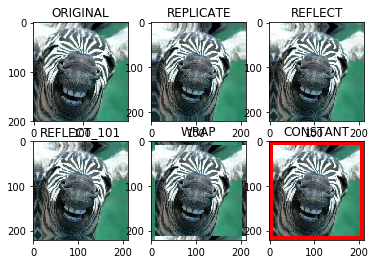

In [32]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

BLUE = [255,0,0]

img1 = cv2.imread('Asset/gambar.jpg')

replicate = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_CONSTANT,value=BLUE)

plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')

plt.show()

Atau jika code tersebut tidak sesuai dengan keinginan kalian, bisa menggunakan fungsi berikut

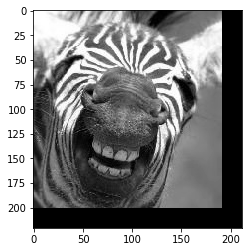

In [41]:
def add_image_padding(image, iterasi):
    temp = image.copy()
    for i in range(0, iterasi):
        # print(i)
        zero_padding_row = np.zeros(temp.shape[0])
        # ROW
        # temp = np.insert(temp, 0, zero_padding_row, axis=1)
        temp = np.insert(temp, temp.shape[1], zero_padding_row, axis=1)
        # COLUMN
        zero_padding_column = np.zeros(temp.shape[1])
        # temp = np.insert(temp, 0, zero_padding_column, axis=0)
        temp = np.insert(temp, temp.shape[0], zero_padding_column, axis=0)
    temp_t = temp.T
    for i in range(0, iterasi):
        # print(i)
        zero_padding_row = np.zeros(temp_t.shape[0])
        # ROW
        # temp = np.insert(temp, 0, zero_padding_row, axis=1)
        temp_t = np.insert(temp_t, temp_t.shape[1], zero_padding_row, axis=1)
        # COLUMN
        zero_padding_column = np.zeros(temp_t.shape[1])
        # temp = np.insert(temp, 0, zero_padding_column, axis=0)
        temp_t = np.insert(temp_t, temp_t.shape[0], zero_padding_column, axis=0)
    temp = temp_t.T
    return temp

img_padding = add_image_padding(gray_img, 10)
plt.imshow(img_padding, cmap='gray')
plt.show()
# Sempurnakan code diatas agar dapat pada setiap sisinya

#### 6. Menyimpan citra
Untuk menyimpan citra yang telah diedit, opencv menyediakan method khusu yakni:

```python
cv2.imwrite(string_nama_dengan_ekstensi, variabel_citra)

# Ekstensi yang bisa digunakan antara lain seperti *.jpg, *.png atau *.pgm

# Contoh
cv2.imwrite("zebra.jpg", img)
```

Tutorial pertama sampai sini dulu ya! Berikutnya kita akan membahas tentang fungsi lain dari OpenCV